In [1]:
import os 
import random

import cv2 as cv
import numpy as np
import nibabel as nib
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_path_source_dir = os.path.join('ml4h_proj1_colon_cancer_ct', 'ml4h_proj1_colon_cancer_ct')

In [41]:
type(tr_df)

pandas.core.frame.DataFrame

In [3]:
def get_img_path_df(dir_, col_prefix):
    img_path_list = [os.path.join(dir_, filename) for filename in os.listdir(dir_) if filename != '.DS_Store' and '._' not in filename]
    img_num_list = [filename.split('colon_')[1].split('.nii.gz')[0] for filename in os.listdir(dir_) if filename != '.DS_Store' and '._' not in filename]
    
    img_path_df = pd.DataFrame({f'{col_prefix}_img_path': img_path_list,
                                'index': img_num_list})\
                    .set_index('index')
    
    return img_path_df

In [4]:
def add_depth_image(df_, col_name):
    channel_number_list = list()
    
    for index, img_path in df_[col_name].iteritems():
        channel_number_list.append(nib.load(img_path).shape[-1])
        
    return channel_number_list
        

In [5]:
def create_depth_based_index(df_, col_to_use='depth'):
    df_ = pd.DataFrame(
        df_[col_to_use].map(lambda depth: list(range(depth))).explode().rename('depth_i')
    )\
    .join(df_)\
    .set_index('depth_i', append=True)
    
    return df_

In [6]:
def build_train_test_df(data_path_source_dir_):
    x_dir_path_tr = os.path.join(data_path_source_dir_, 'imagesTr')
    y_dir_path_tr = os.path.join(data_path_source_dir_, 'labelsTr')
    
    x_tr_df = get_img_path_df(dir_=x_dir_path_tr, col_prefix='x_tr')
    x_tr_df['x_tr_img_depth'] =  add_depth_image(df_=x_tr_df, col_name='x_tr_img_path')
    
    y_tr_df = get_img_path_df(dir_=y_dir_path_tr, col_prefix='y_tr')
    y_tr_df['y_tr_img_depth'] =  add_depth_image(df_=y_tr_df, col_name='y_tr_img_path')
    
    tr_df_ = x_tr_df.join(y_tr_df, how='inner')

    assert (tr_df_.x_tr_img_depth == tr_df_.y_tr_img_depth).all()
    
    tr_df_ = tr_df_.drop('y_tr_img_depth', axis=1).rename(columns={'x_tr_img_depth':'depth'})
    
    tr_df_ = create_depth_based_index(df_=tr_df_, col_to_use='depth')
    
    # Convert to series 
    x_dir_path_ts = os.path.join(data_path_source_dir_, 'imagesTs')
    x_ts_df_ = get_img_path_df(dir_=x_dir_path_ts, col_prefix='x_ts')
    x_ts_df_['depth'] = add_depth_image(df_=x_ts_df_, col_name='x_ts_img_path')
    x_ts_df_ = create_depth_based_index(df_=x_ts_df_, col_to_use='depth')
    
    return tr_df_, x_ts_df_

In [7]:
tr_df, x_ts_df = build_train_test_df(data_path_source_dir_=data_path_source_dir)

In [8]:
tr_df.head(10)

x_tr_img_path  depth  \
index depth_i                                                             
001   0        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      1        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      2        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      3        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      4        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      5        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      6        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      7        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      8        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      9        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   

                                                   y_tr_img_path  
index depth_i                                                     
001   0        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      1        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      2        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      3        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      4        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      5        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      6        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      7        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      8        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      9        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...

In [9]:
x_ts_df.head(10)

x_ts_img_path  depth
index depth_i                                                          
171   0        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      1        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      2        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      3        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      4        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      5        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      6        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      7        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      8        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119
      9        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    119

## 2D Generator

Now let's set up the generator class that mini batches the data and also that applies augmentation

In [10]:
class DataGenerator2D(tf.keras.utils.Sequence):
    def __init__(self, df, x_col, y_col=None, batch_size=32, num_classes=None, shuffle=True,
                 resize_dim=None, hounsfield_min=-1000, hounsfield_max=2000,
                 rotate_range=None, horizontal_flip=False, vertical_flip=False
                ):
        self.batch_size = batch_size
        self.df = df
        self.indices = self.df[[]]
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.x_col = x_col
        self.y_col = y_col
        
        # Preprocessing attributes
        self.resize_dim = resize_dim
        self.hounsfield_min = hounsfield_min
        self.hounsfield_max = hounsfield_max
        
        # Augmentation operations and their parameters
        self.aug_operations = self.get_aug_operations(
            rotate_range=rotate_range, 
            horizontal_flip=horizontal_flip, 
            vertical_flip=vertical_flip
        )
        
        self.on_epoch_end()

    def __len__(self):
        return len(self.indices) // self.batch_size

    def __getitem__(self, index):
        # Get indexes that will be used in the minibatch
        batch_idx = self.indices.iloc[pd.IndexSlice[index*self.batch_size : (index + 1)*self.batch_size, :]].index
        
        X, y = self.__get_data(batch_idx)
        
        return X, y

    def on_epoch_end(self):
        if self.shuffle == True:
            # Shuffle indexes
            shuffled_img_idx = np.random.choice(self.indices.index.levels[0], self.indices.index.levels[0].shape[0], replace=False)
            
            # Reorder index dataframe with new image indices
            self.indices = self.indices.loc[pd.IndexSlice[shuffled_img_idx, :], :]
                    

    def __get_data(self, batch_idx):
        y = None
        current_image_path = ''
        
        for i, (index, row) in enumerate(self.df.loc[batch_idx].iterrows()):
            
            # Only load a new CT scan if we need to, as we are iterating over the cuts
            if row[self.x_col] != current_image_path:
                x_img = nib.load(row[self.x_col]).get_fdata()
                
                if self.y_col is not None: 
                    y_img = nib.load(row[self.y_col]).get_fdata()
            
                current_image_path = row[self.x_col] 
            
            # Extract the channel/depth indicated in the index
            x_i = x_img[:, :, index[1]]
            
            if self.y_col is not None: 
                y_i = y_img[:, :, index[1]]
            
            # Preprocess image
            x_i = self.preprocess_img(x_i)
            
            if self.y_col is not None: 
                y_i = self.preprocess_img(y_i, label=True)
            
            # Apply augmentation operations to both x_i and y_i (if available)
            # Choose randomly one of the available operations to augment
            if len(self.aug_operations) > 1:
                aug_operation_i = random.choice(list(self.aug_operations.keys()))
                x_i = self.augment_img(img_=x_i, aug_operation_=aug_operation_i)
                
                if self.y_col is not None: 
                    y_i = self.augment_img(img_=y_i, aug_operation_=aug_operation_i)
            
            # Reshape before adding to the minibatch
            x_i = x_i.reshape((1,) + x_i.shape)
            if self.y_col is not None: 
                y_i = y_i.reshape((1,) + y_i.shape)
            
            # Add them to the minibatch 
            if i == 0:
                X = x_i
                if self.y_col is not None: 
                    y = y_i
            else:
                X = np.concatenate([X, x_i], axis=0)
                if self.y_col is not None: 
                    y = np.concatenate([y, y_i], axis=0)
                    
        return X, y
    
    def get_aug_operations(self, **kwargs):
        total_aug_operation_list = ['rotate_range', 'horizontal_flip', 'vertical_flip']
        aug_operations = {key: value for key, value in kwargs.items() if value is not None and value \
                                    and key in total_aug_operation_list}
        
        aug_operations['identity'] = True
        
        return aug_operations
        
    
    def preprocess_img(self, img_, label=False):
    
        if not label:
            # Cap the pixel values
            img_[img_ < self.hounsfield_min] = self.hounsfield_min
            img_[img_ > self.hounsfield_max] = self.hounsfield_max

            # Normalize the image's intensity range
            hounsfield_range = self.hounsfield_max - self.hounsfield_min
            img_ = (img_ - self.hounsfield_min) / hounsfield_range
        
        # Return them normalized
        if self.resize_dim is not None:
            img_ = cv.resize(img_, self.resize_dim, interpolation=cv.INTER_AREA)
        
        return img_
    
    def augment_img(self, img_, aug_operation_):
        
        if aug_operation_ == 'rotate_range':
            angle = np.random.uniform(-self.aug_operations[aug_operation_], self.aug_operations[aug_operation_])
            (h, w) = img_.shape[:2]
            (cX, cY) = (w // 2, h // 2)
            M = cv.getRotationMatrix2D((cX, cY), angle, 1.0)
            rotated_img_ = cv.warpAffine(img_, M, (w, h))
            
            return rotated_img_
            
        elif aug_operation_ == 'horizontal_flip':
            img_ = flipped = cv.flip(img_, 1)
            return img_
        
        elif aug_operation_ == 'vertical_flip':
            img_ = flipped = cv.flip(img_, 0)
            return img_
        
        elif aug_operation_ == 'identity':
            return img_
        
        else:
            raise('Augmented operation not programmed')
        

In [11]:
tr_gen = DataGenerator2D(df=tr_df, x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=True)

In [12]:
i = 0
for X, y in (tr_gen):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    i+=1
    if i==3: break
    

X: (4, 512, 512)
y: (4, 512, 512)
X: (4, 512, 512)
y: (4, 512, 512)
X: (4, 512, 512)
y: (4, 512, 512)


In [13]:
tr_gen = DataGenerator2D(df=tr_df, x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=1, num_classes=None, shuffle=True, 
                         resize_dim=(128, 128),
                         rotate_range=None, horizontal_flip=False, vertical_flip=True)

In [14]:
i = 0
for X, y in (tr_gen):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    i+=1
    if i==3: break
    

X: (1, 128, 128)
y: (1, 128, 128)
X: (1, 128, 128)
y: (1, 128, 128)
X: (1, 128, 128)
y: (1, 128, 128)


### Let's check the behavior of the generator

In [15]:
random.seed(123)
np.random.seed(123)

Let's choose a set of images that have cancer labeled in them 

In [16]:
cancer_pixels_df = pd.read_pickle('cancer_pixels_df')
cancer_pixels_df.reset_index(inplace=True)

In [17]:
cancer_pixels_df['index'] = cancer_pixels_df.image_name.map(lambda str_: str_.split('.nii.gz')[0].split('colon_')[1])

In [18]:
tr_df_only_cancer = cancer_pixels_df.set_index(['index', 'depth_i'])[['cancer_pixel_area']].join(tr_df, how='inner')

In [19]:
tr_df_only_cancer

cancer_pixel_area  \
index depth_i                      
001   51                   841.0   
      52                   646.0   
      53                   296.0   
005   44                   278.0   
      50                   270.0   
...                          ...   
169   139                  245.0   
      140                  228.0   
      141                  198.0   
      142                  153.0   
      143                  131.0   

                                                   x_tr_img_path  depth  \
index depth_i                                                             
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
...                                                          ...    ...   
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   

                                                   y_tr_img_path  
index depth_i                                                     
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
...                                                          ...  
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  

[1034 rows x 4 columns]

Let's try it with no augmentations or resizing

In [20]:
tr_gen_no_mod = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=None, horizontal_flip=False, vertical_flip=False)

X: (4, 512, 512)
y: (4, 512, 512)


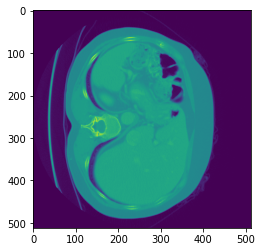

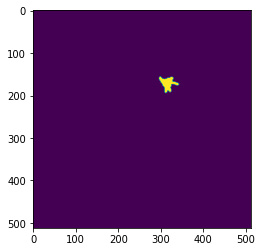

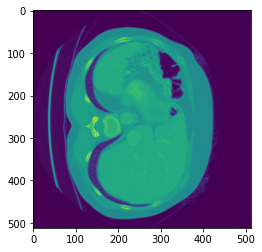

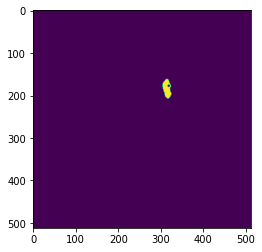

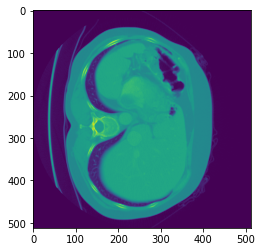

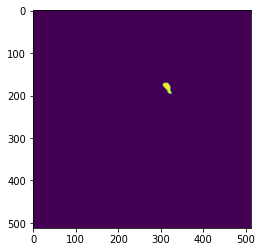

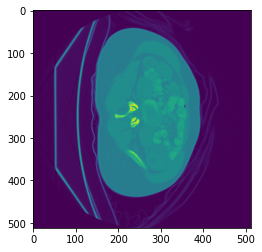

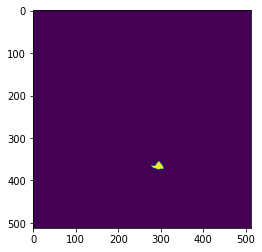

In [21]:
for X, y in (tr_gen_no_mod):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Vertical flips

In [22]:
tr_vert = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=None, horizontal_flip=None, vertical_flip=True)

X: (4, 512, 512)
y: (4, 512, 512)


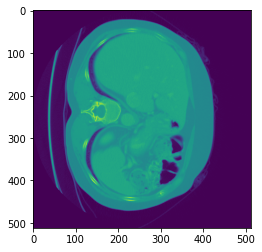

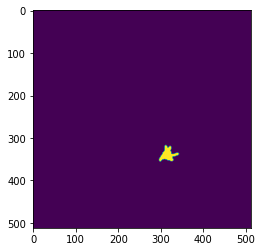

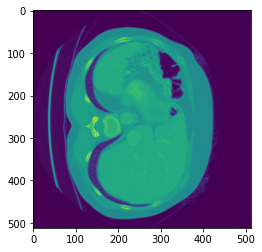

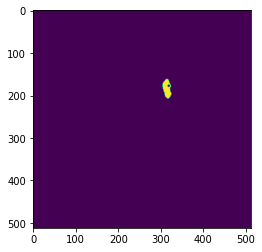

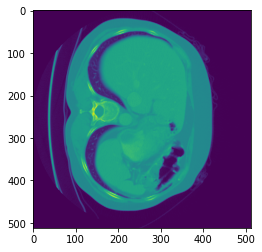

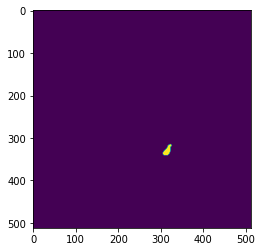

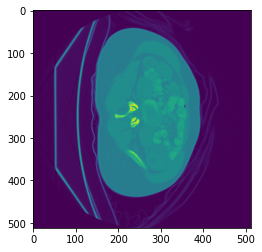

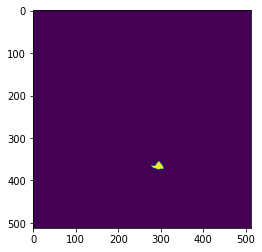

In [23]:
for X, y in (tr_vert):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Horizontal flips

In [24]:
tr_hor = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=None, horizontal_flip=True, vertical_flip=False)

X: (4, 512, 512)
y: (4, 512, 512)


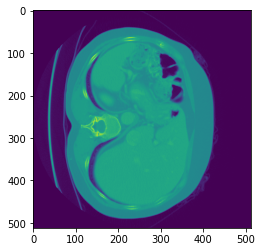

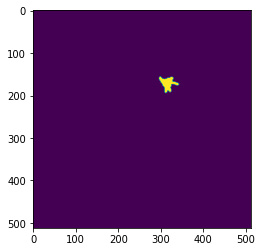

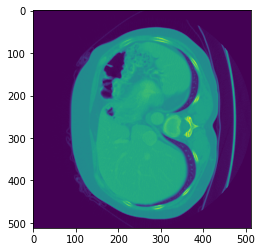

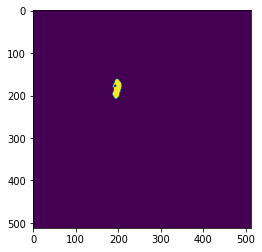

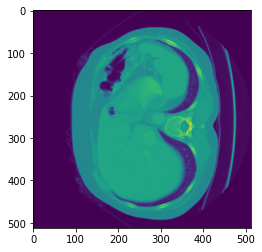

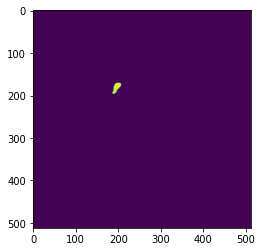

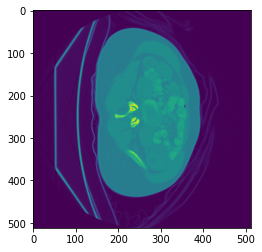

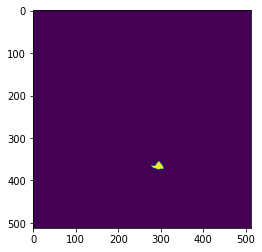

In [25]:
for X, y in (tr_hor):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Rotate

In [26]:
tr_rot = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=30, horizontal_flip=False, vertical_flip=False)

X: (4, 512, 512)
y: (4, 512, 512)


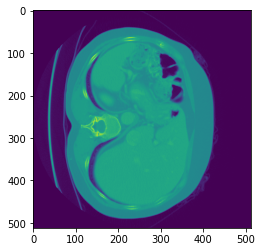

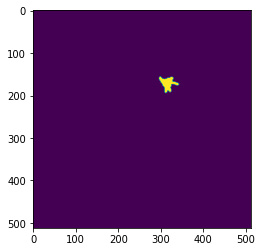

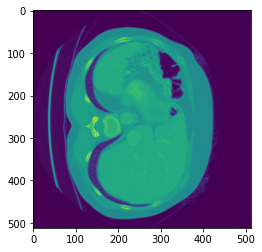

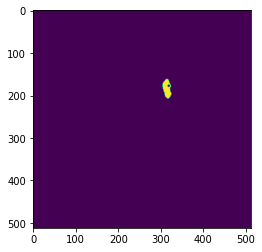

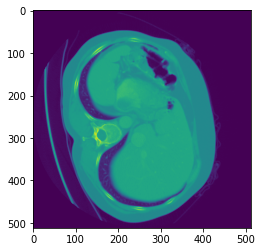

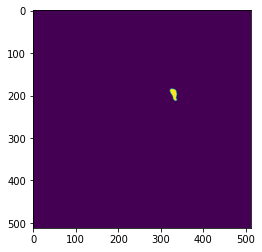

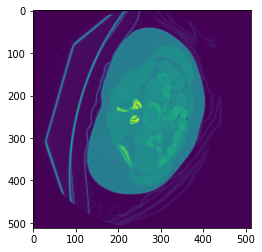

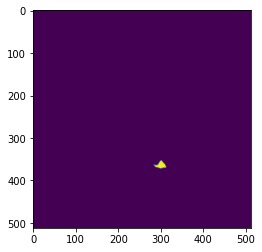

In [27]:
for X, y in (tr_rot):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Resize

In [28]:
tr_resize = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                            resize_dim=(128, 128),
                            rotate_range=None, horizontal_flip=False, vertical_flip=False)

X: (4, 128, 128)
y: (4, 128, 128)


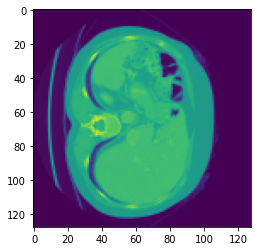

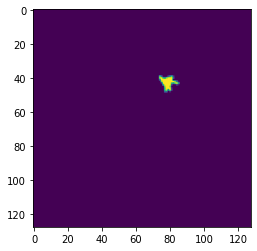

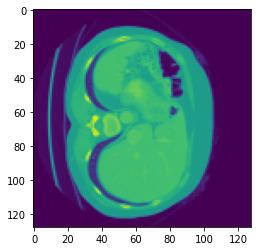

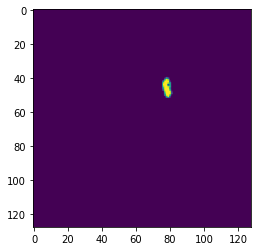

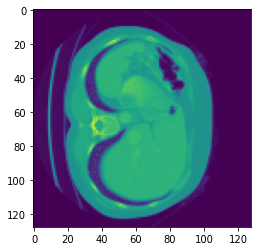

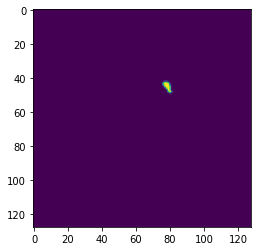

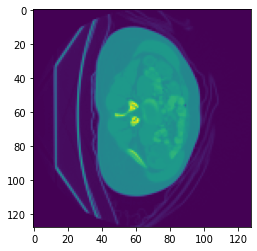

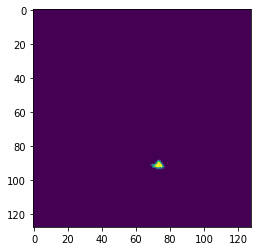

In [29]:
for X, y in (tr_resize):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Random zooming

In [52]:
tr_resize = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                            resize_dim=(128, 128),
                            rotate_range=None, horizontal_flip=False, vertical_flip=False)

In [54]:
from tensorflow.keras.preprocessing.image import random_zoom

In [55]:
a = {}

In [56]:
a.update({'a': 12, 'b':3})

In [57]:
a

{'a': 12, 'b': 3}

X: (4, 128, 128)
y: (4, 128, 128)


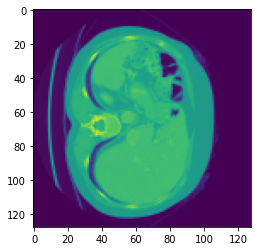

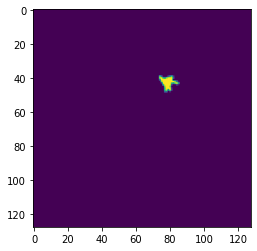

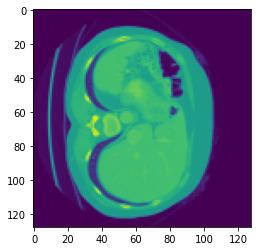

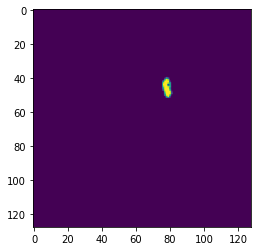

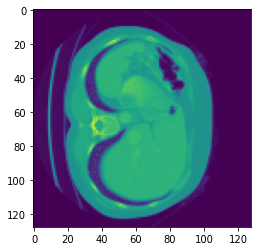

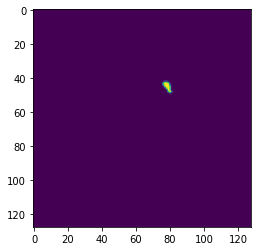

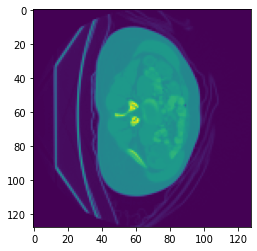

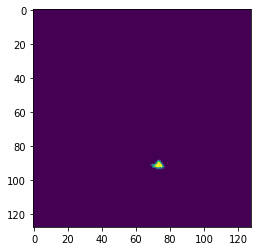

In [53]:
for X, y in (tr_resize):
    before random_
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

### Test it so far with a 2D Unet

In [31]:
from keras_unet.models import custom_unet
from tensorflow.keras.optimizers import Adam, SGD
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

model = custom_unet(
    input_shape=(512, 512, 1),
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid')

In [ ]:
tr_generator = DataGenerator2D(df=tr_df, x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=32, num_classes=None, shuffle=False, 
                               resize_dim=None,
                               rotate_range=30, horizontal_flip=True, vertical_flip=True)

In [33]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [34]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [32]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17943959782220325349
]


In [33]:
model.compile(
    optimizer=Adam(), 
    #optimizer=SGD(lr=0.01, momentum=0.99),
    loss='binary_crossentropy',
    #loss=jaccard_distance,
    metrics=[iou, iou_thresholded]
)

In [455]:
model.fit(tr_generator, epochs=1)

KeyboardInterrupt: 

## 3D Generator

In [96]:
class DataGenerator3D(tf.keras.utils.Sequence):
    def __init__(self, df, x_col, y_col=None, batch_size=32, num_classes=None, shuffle=True):
        self.batch_size = batch_size
        self.df = df
        self.indices = self.df.index.tolist()
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.x_col = x_col
        self.y_col = y_col
        self.on_epoch_end()

    def __len__(self):
        return len(self.indices) // self.batch_size

    def __getitem__(self, index):
        # Get indexes that will be used in the minibatch
        index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
        batch = [self.indices[k] for k in index]
        
        X, y = self.__get_data(batch)
        return X, y

    def on_epoch_end(self):
        self.index = np.arange(len(self.indices))
        if self.shuffle == True:
            np.random.shuffle(self.index)

    def __get_data(self, batch):
        y = None
        
        for i, id_ in enumerate(batch):
            x_i = nib.load(self.df.loc[id_, self.x_col]).get_fdata()
            x_i = x_i.reshape((1,) + x_i.shape)
            
            if self.y_col is not None: 
                y_i = nib.load(self.df.loc[id_, self.y_col]).get_fdata()
                y_i = y_i.reshape((1,) + y_i.shape)
            
            #TODO: Cannot concatenate images of different channel dim
            # Add them to the minibatch 
            if i == 0:
                X = x_i
                if self.y_col is not None: 
                    y = y_i
            else:
                X = np.concatenate([X, x_i], axis=0)
                if self.y_col is not None: 
                    y = np.concatenate([y, y_i], axis=0)
                    
        return X, y

In [36]:
tr_df

x_tr_img_path  depth  \
index depth_i                                                             
001   0        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      1        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      2        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      3        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      4        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
...                                                          ...    ...   
169   253      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      254      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      255      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      256      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      257      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   

                                                   y_tr_img_path  
index depth_i                                                     
001   0        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      1        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      2        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      3        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      4        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
...                                                          ...  
169   253      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      254      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      255      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      256      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      257      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  

[10162 rows x 3 columns]

In [51]:
for i, df_ in tr_df.groupby(level=0):
    display(df_)
    breal

x_tr_img_path  depth  \
index depth_i                                                             
001   0        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      1        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      2        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      3        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      4        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      5        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      6        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      7        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      8        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      9        ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      10       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      11       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      12       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      13       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      14       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      15       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      16       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      17       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      18       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      19       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      20       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      21       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      22       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      23       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      24       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      25       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      26       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      27       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      28       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      29       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      30       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      31       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      32       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      33       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      34       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      35       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      36       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      37       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      38       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      39       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      40       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      41       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      42       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      43       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      45       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      46       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      47       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      48       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      49       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
 

NameError: name 'breal' is not defined

In [39]:
tr_df.loc['169']

,x_tr_img_path,depth,y_tr_img_path
depth_i,,,
0,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
1,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
2,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
3,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
4,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
...,...,...,...
253,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
254,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...
255,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...,258,ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...


In [42]:
import typing

In [45]:
type(tr_df.index)

pandas.core.indexes.multi.MultiIndex

In [47]:
type(tr_df)

pandas.core.frame.DataFrame

In [46]:
typing.TypeVar(tr_df.index)

TypeError: cannot perform __radd__ with this index type: MultiIndex